## Türk Lirası Banknot Tanıma ##

## Kütüphaneleri Yükle ##

In [77]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

pd.set_option('display.max_colwidth', None)  # Tüm sütun genişliğini göster

## Veri Setini Tanımla ##

In [78]:
labels=['5','10','20','50','100','200']
img_path='/kaggle/input/turkish-lira-banknote-dataset/'
#/kaggle/input/turkish-lira-banknote-dataset/10
#/kaggle/input/turkish-lira-banknote-dataset/5
#/kaggle/input/turkish-lira-banknote-dataset/5/5_1_0001.png

In [79]:
# DF için img ve label listesi
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [80]:
df=pd.DataFrame({'path':img_list,'label':label_list})
df.head()

,path,label
0,/kaggle/input/turkish-lira-banknote-dataset/5/flipped_5_2_0046.png,5
1,/kaggle/input/turkish-lira-banknote-dataset/5/flipped_5_2_0014.png,5
2,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_1_0122.png,5
3,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_2_0076.png,5
4,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_2_0019.png,5


## EDA ##

In [81]:
df.sample(5)

,path,label
978,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_2_0003.png,5
4621,/kaggle/input/turkish-lira-banknote-dataset/100/flipped_100_1_0005.png,100
2031,/kaggle/input/turkish-lira-banknote-dataset/20/20_1_0062.png,20
836,/kaggle/input/turkish-lira-banknote-dataset/5/saltAndPeppered_5_2_0002.png,5
621,/kaggle/input/turkish-lira-banknote-dataset/5/saltAndPeppered_5_1_0064.png,5


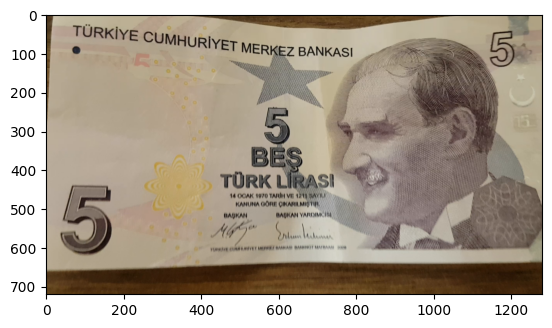

In [82]:
from PIL import Image
img=Image.open('/kaggle/input/turkish-lira-banknote-dataset/5/5_1_0001.png')
#img
plt.imshow(img)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6000 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


## Etiektleri Label Encoding ##

In [84]:
d={'5':0, '10':1,
  '20':2, '50':3,
  '100':4, '200':5}

In [85]:
df['encode_labels']=df['label'].map(d)
#df.label.replece(d,inplace=True)
df

,path,label,encode_labels
0,/kaggle/input/turkish-lira-banknote-dataset/5/flipped_5_2_0046.png,5,0
1,/kaggle/input/turkish-lira-banknote-dataset/5/flipped_5_2_0014.png,5,0
2,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_1_0122.png,5,0
3,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_2_0076.png,5,0
4,/kaggle/input/turkish-lira-banknote-dataset/5/eplus_5_2_0019.png,5,0
...,...,...,...
5995,/kaggle/input/turkish-lira-banknote-dataset/200/200_1_0278.png,200,5
5996,/kaggle/input/turkish-lira-banknote-dataset/200/eminus_200_1_0105.png,200,5
5997,/kaggle/input/turkish-lira-banknote-dataset/200/flipped_200_1_0051.png,200,5
5998,/kaggle/input/turkish-lira-banknote-dataset/200/eminus_200_1_0007.png,200,5


## Etiket Dağılımı ##

<Axes: xlabel='label'>

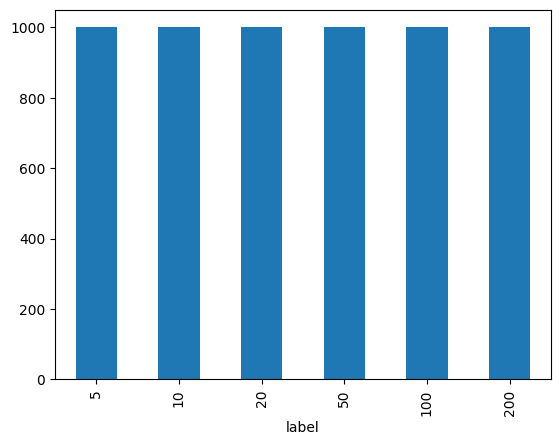

In [86]:
df['label'].value_counts().plot(kind='bar')

## Rastgele Örnekler Göster ##

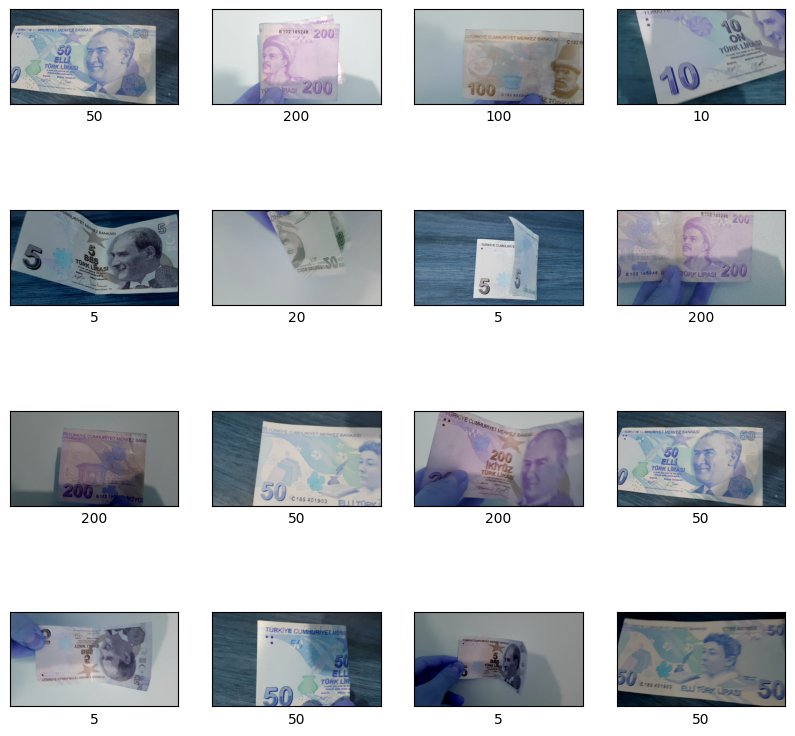

In [87]:
fig,ax=plt.subplots(4,4, figsize=(10,10))
df_sample=df.sample(16)
for i, axi in enumerate (ax.flat):
    axi.imshow(cv2.imread(str(df_sample['path'].iloc[i])))
    axi.set(xticks=[],yticks=[], xlabel=df_sample['label'].iloc[i])

## Rssimleri ön İşleme ##

In [88]:
X=[]
for img in df['path']:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))
    img=img/255.0
    X.append(img)

In [89]:
X=np.array(X)

In [90]:
def img_preprocess(df):
    for img in df:
        img=cv2.imread(img)
        img=cv2.resize(img,(30,30))
        img=img/255.0
        X.append(img)
        X=np.array(X)
        return X
#img_preprocess(df['path'])

In [91]:
y=df['encode_labels']

## Veri setini Böl ##

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeli Oluştur ##

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Modeli oluştur
model = Sequential()

# Input katmanı
model.add(Input(shape=(30, 30, 3)))

# 1. Convential bloğu
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 2. Convential bloğu
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 3. Convential bloğu
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 4. Convential bloğu
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Tam bağlantılı katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Erken durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

# Modeli derle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdır
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │         1,54

 Total params: 1,439,782 (5.49 MB)

 Trainable params: 1,438,246 (5.49 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Modeli Eğit ##

In [137]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), #validation_split=0.2,
                    epochs=10,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9824 - loss: 0.0510 - val_accuracy: 0.9758 - val_loss: 0.0900
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9847 - loss: 0.0459 - val_accuracy: 0.9967 - val_loss: 0.0177
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 0.9600 - val_loss: 0.1251
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9840 - loss: 0.0452 - val_accuracy: 0.9883 - val_loss: 0.0356
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9801 - loss: 0.0689 - val_accuracy: 0.9908 - val_loss: 0.0247
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [139]:
model.save('tr_banknot_model.h5')

## Mdoeli Değerlendir ##

In [122]:
#val üzerinden tahminleri yap ve karılaştır
y_pred_proba=model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [124]:
y_pred_proba

array([[3.2581566e-03, 9.9528021e-01, 3.9547809e-05, 1.2450794e-03,
        5.0956976e-07, 1.7653838e-04],
       [5.8045571e-06, 1.5945172e-04, 1.9502359e-05, 9.9979246e-01,
        5.4742186e-06, 1.7334825e-05],
       [9.9994552e-01, 2.3892171e-06, 1.5053973e-05, 1.7059500e-06,
        3.3369757e-05, 2.0770906e-06],
       ...,
       [3.8964944e-07, 2.0282526e-07, 9.9999440e-01, 1.3547255e-07,
        4.7413055e-06, 1.6660641e-07],
       [1.0028441e-05, 4.6408953e-05, 4.5505076e-05, 3.8674439e-06,
        2.0464595e-05, 9.9987376e-01],
       [4.2708401e-04, 9.9890137e-01, 7.0742408e-06, 6.1707839e-04,
        4.5804285e-08, 4.7396952e-05]], dtype=float32)

In [125]:
y_pred=np.argmax(y_pred_proba,axis=1)

In [126]:
df_cm=pd.DataFrame({'Gerçek Değerler':y_test,'Tahmin Edilen Değerler':y_pred})
df_cm

,Gerçek Değerler,Tahmin Edilen Değerler
1782,1,1
3917,3,3
221,0,0
2135,2,2
5224,5,5
...,...,...
2543,2,2
1773,1,1
2846,2,2
5799,5,5


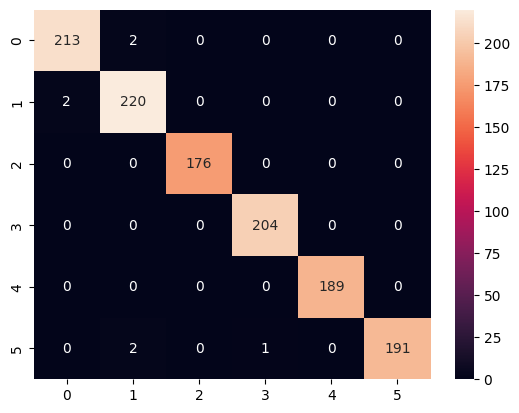

In [127]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt="d")
plt.show()

In [128]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       215
           1       0.98      0.99      0.99       222
           2       1.00      1.00      1.00       176
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00       189
           5       1.00      0.98      0.99       194

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



array([[213,   2,   0,   0,   0,   0],
       [  2, 220,   0,   0,   0,   0],
       [  0,   0, 176,   0,   0,   0],
       [  0,   0,   0, 204,   0,   0],
       [  0,   0,   0,   0, 189,   0],
       [  0,   2,   0,   1,   0, 191]])

In [107]:
#y_test.replace({0:5,1:10,3:2,4:3,5:4,6:5},inplace=True)""